In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu', name='layer_1'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')])


In [4]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer_1 (Dense)             (None, 16)                12560     
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16,(3,3), activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [7]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 16)         0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16,(3,3), padding='SAME',activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [9]:
# Print the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1296)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                12970     
                                                                 
Total params: 13,130
Trainable params: 13,130
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16,(3,3),padding='SAME',strides=2,activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [11]:
# Print the model summary

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 2,730
Trainable params: 2,730
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [12]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=[acc])


In [13]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)


sparse_categorical_crossentropy
[]


***
<a id="coding_tutorial_4"></a>
## The fit method (Putting previous steps together!)

In [14]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [16]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                10250     
                                                                 
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=[acc, mae])

In [19]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


#### Load the data

In [20]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [21]:
# Print the shape of the training data
train_images.shape


(60000, 28, 28)

In [22]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(train_labels[0])

9


In [23]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255.
test_images = test_images / 255.


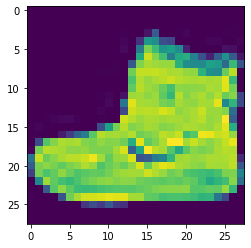

label: Ankle boot


In [24]:
# Display one of the images
i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

In [25]:
train_images.shape

(60000, 28, 28)

#### Fit the model

In [26]:
# Fit the model
history = model.fit(train_images, train_labels,epochs=8,batch_size=256)


Epoch 1/8
235/235 [==============================] - 4s 17ms/step - loss: 0.5551 - sparse_categorical_accuracy: 0.8056 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 [==============================] - 4s 17ms/step - loss: 0.3676 - sparse_categorical_accuracy: 0.8706 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 [==============================] - 4s 17ms/step - loss: 0.3333 - sparse_categorical_accuracy: 0.8821 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 [==============================] - 4s 17ms/step - loss: 0.3159 - sparse_categorical_accuracy: 0.8881 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 [==============================] - 4s 17ms/step - loss: 0.3038 - sparse_categorical_accuracy: 0.8918 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 [==============================] - 4s 17ms/step - loss: 0.2957 - sparse_categorical_accuracy: 0.8942 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 [==============================] - 4s 16ms/step - loss: 0.2905 - sparse_categorical_accu

#### Plot training history

In [27]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()


,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.555088,0.805617,4.419999
1,0.367599,0.870583,4.420001
2,0.333318,0.882133,4.420001
3,0.315882,0.888050,4.420000
4,0.303814,0.891767,4.420001


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

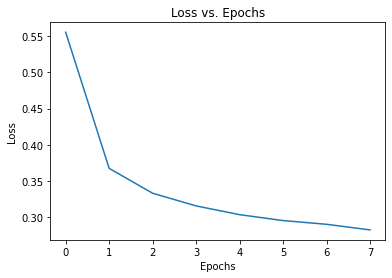

In [28]:
# Make a plot for the loss

loss_plot = df.plot(y='loss',title='Loss vs. Epochs',legend=False)
loss_plot.set(xlabel='Epochs',ylabel='Loss')

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

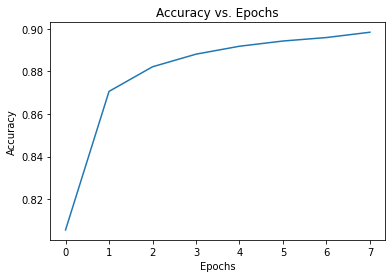

In [29]:
# Make a plot for the accuracy
acc_plot = df.plot(y='sparse_categorical_accuracy',title='Accuracy vs. Epochs',legend=False)
acc_plot.set(xlabel='Epochs',ylabel='Accuracy')


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Mean Absolute Error')]

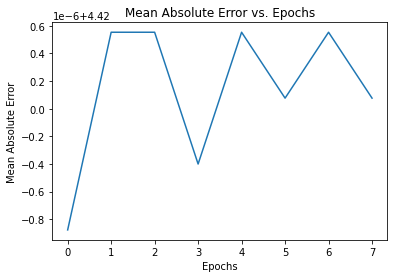

In [30]:
# Make a plot for the additional metric

mae_plot = df.plot(y='mean_absolute_error',title='Mean Absolute Error vs. Epochs',legend=False)
mae_plot.set(xlabel='Epochs',ylabel='Mean Absolute Error')

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [31]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [32]:
# Evaluate the model
test_loss, test_accuracy, test_mae = model.evaluate(test_images[...,np.newaxis],test_labels)


313/313 [==============================] - 1s 1ms/step - loss: 0.3165 - sparse_categorical_accuracy: 0.8867 - mean_absolute_error: 4.4200


#### Make predictions from the model

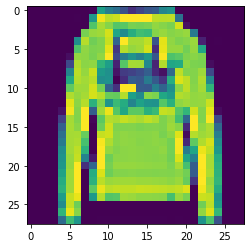

Label: Pullover


In [33]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])
inx = 30

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [46]:
# Get the model predictions

predictions = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model prediction: {labels[np.argmax(predictions)]}")

1/1 [==============================] - 0s 16ms/step
Model prediction: Pullover
